## Imports

In [23]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import netCDF4
import cftime
import pandas as pd
import iris
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt
from datetime import datetime
import cartopy.crs as ccrs
from scipy.interpolate import griddata
from statistics import variance
from scipy.stats import pearsonr
import scipy.stats as st
import statistics
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import xskillscore as xs

In [2]:
OSD = xr.open_dataset('hum_obs_OSD.nc')

In [4]:
OSD = OSD.chunk(chunks={'obs':50})

In [5]:
OSD = OSD.where((OSD['time.year']>=1950) & (OSD['time.year']<=2010), drop=True)

In [6]:
OSD = OSD.where((OSD.z>100) & (OSD.z<400), drop=True)

In [7]:
O2_model = xr.open_dataarray('Humboldt_O2full_regridded.nc')
O2_model = O2_model.rename(z_t='z')

In [8]:
O2_model = O2_model.sel(time=slice('1950','2010'))
O2_model = O2_model.sel(z=slice(100,400))
O2_model = O2_model.sel(lat=slice(-45,-20))
O2_model['lon'] = O2_model['lon']-360

In [9]:
OSD_oxygen = OSD.Oxygen

In [11]:
OSD_oxygen_yearly = OSD_oxygen.groupby('time.year').mean('obs').load()

In [13]:
OSD_oxygen = OSD_oxygen.load()

In [14]:
O2_model = O2_model.load()

In [15]:
O2_model_subsampled = O2_model.sel(time=OSD.time, lat=OSD.lat, lon=OSD.lon, z=OSD.z, method='nearest')

In [16]:
O2_model_subsampled_ts = O2_model_subsampled.groupby('time.year').mean()

In [24]:
xs.pearson_r(O2_model_subsampled_ts, OSD_oxygen_yearly)

<xarray.DataArray ()>
array(0.91251189)

In [25]:
xs.pearson_r_eff_p_value(O2_model_subsampled_ts, OSD_oxygen_yearly)

/home/ashley.schefler/anaconda3/envs/env3/lib/python3.11/site-packages/xskillscore/core/deterministic.py:462: UserWarning: ['year'] is not 'time'. Make sure that you are applying this over a temporal dimension.
  warnings.warn(


<xarray.DataArray ()>
array(2.67249697e-18)

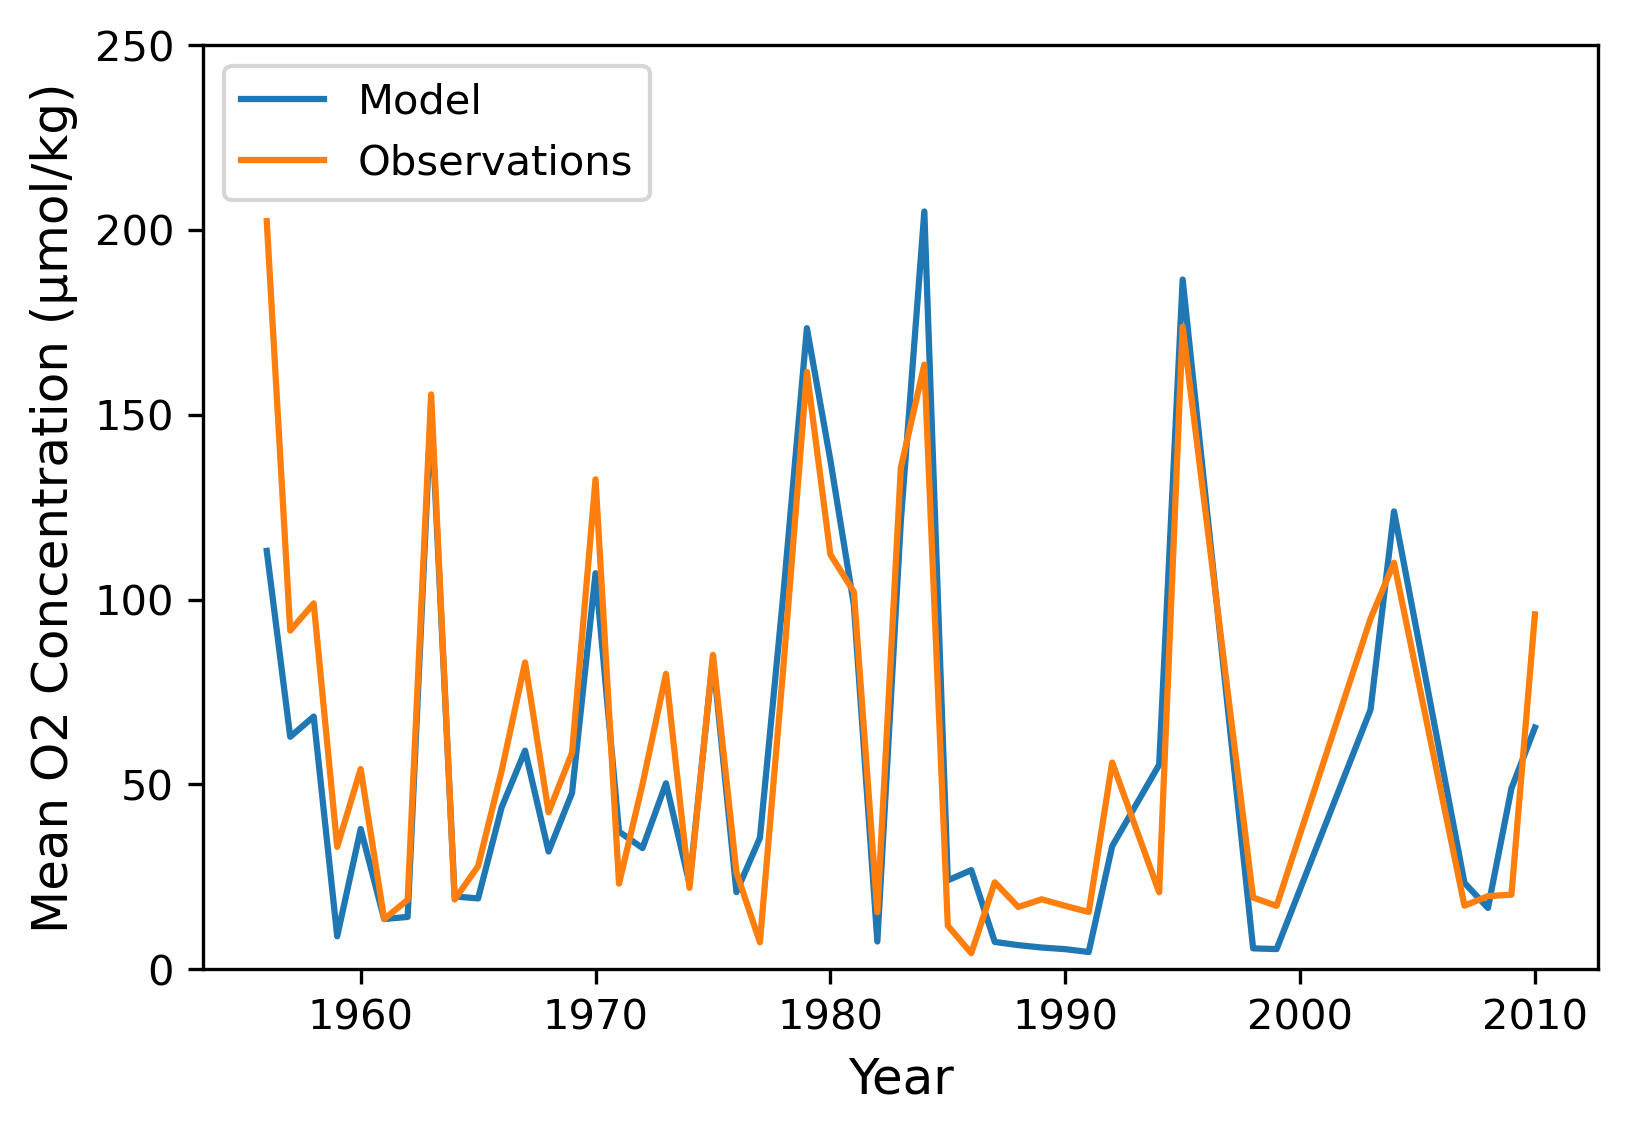

In [37]:
plt.figure(figsize=(6,4), dpi=300)

O2_model_subsampled_ts.plot(label='Model')
OSD_oxygen_yearly.plot(label='Observations')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean O2 Concentration (µmol/kg)', fontsize=12)

plt.legend(loc='upper left')
plt.ylim([0,250])

plt.show()